#### K- Means Clustering using Scikit Learn
* In this task we are going to use ‘Iris’ dataset to predict the optimum number of clusters and represent it visually. 
* Here in this task we will use Python Scikit-Learn library to build our model.

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing dataset

In [2]:
dataset = pd.read_excel('C:\\Users\\Sameer Bagate\\Desktop\\Iris.xlsx', index_col= 'Id')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Preparing the dataset
* Here we divide the dataset into 'independent' variable (regressors) and 'dependent' variable (regressand).

In [3]:
x= dataset.iloc[: , :-1].values 
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Question- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

#### Predicting the the optimum number of clusters 
* here we will use WCSS

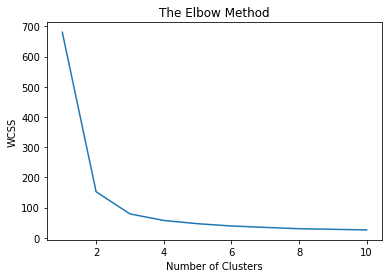

In [6]:
from sklearn.cluster import KMeans
wcss= []                              # Within Cluster Sum of Squares
for i in range(1,11):                 #(1,11)- for 10 clusters
    kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state=42)         #42 is taken as random number
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)        #inertia_   -    inbuilt attribute in KMeans
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method helps use find the optimum numbers of clusters. The optimum number of cluster is the number where elbow occurs in
the elbow method. In graph we can clearly see that elbow occurs at 3. So number of optimum clusters is 3.

#### Training the KMeans Model on Dataset


In [7]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters= 3, init= 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(x)

In [9]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Visualising the clusters

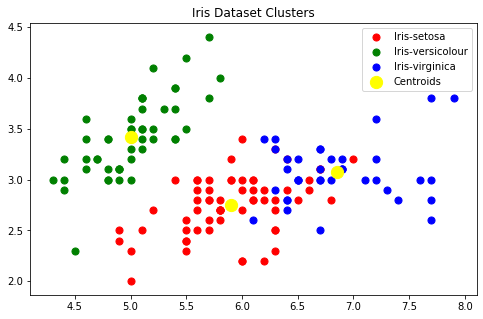

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=50, c='red', label='Iris-setosa')#y_means==0- all the rows with y_means(cluster)==0   x- selecting columns from x 
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=50, c='green', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=50, c='blue', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids')
plt.title('Iris Dataset Clusters')
plt.legend()
plt.show()